## MNIST with Keras

MNIST: ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

KERAS:

In [67]:
#basics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import BatchNormalization
from keras.utils import to_categorical

In [78]:
def confusion_matrix_display(cm):

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap='GnBu')
    plt.title('Confusion Matrix Digits')
    plt.xlabel('Predicted Digits')
    plt.ylabel('True Digits')
    plt.show()

Importing data

In [42]:
# Loading
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

# Separating into target and "features"
y_tr = tr['label'].values
X_tr = tr.drop(columns='label').values

X_te = te.values

Reshaping into 28x28 pixels:

In [43]:
X_tr = X_tr.reshape(-1,28,28,1) / 255

X_te = X_te.reshape(-1,28,28,1) / 255

Visualization:

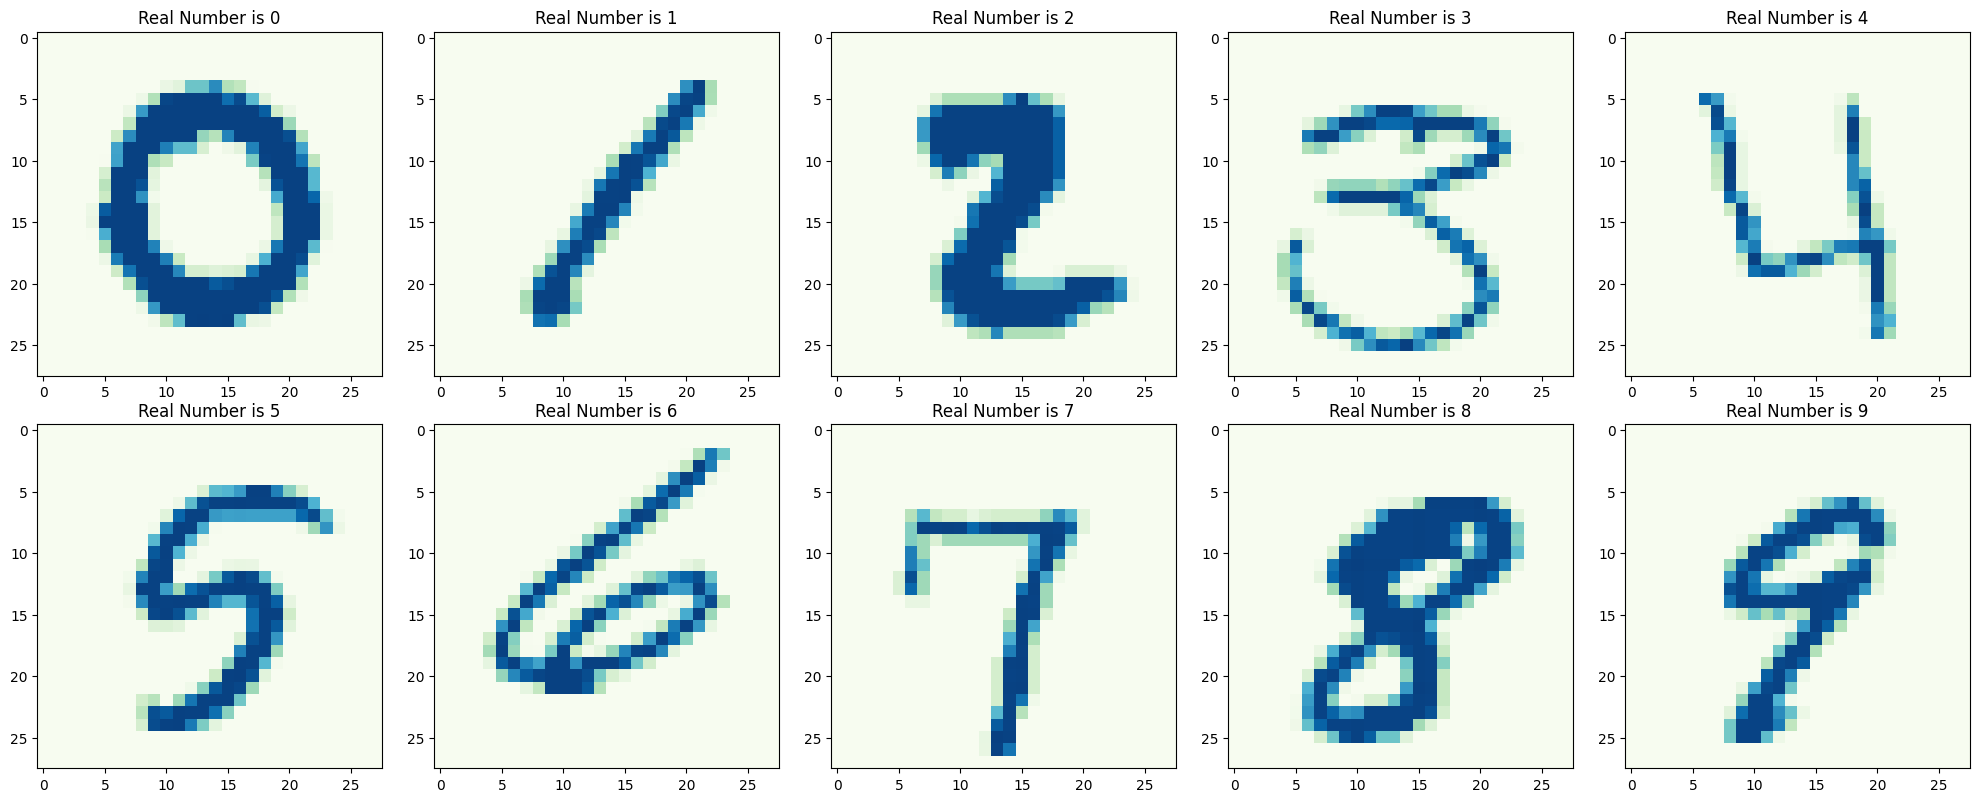

In [44]:
indices = []  # store the index of the first occurrence of each digit

for digit in range(10):
    index = np.where(y_tr == digit)[0][0] # first occurrence
    indices.append(index)


fig, axis = plt.subplots(2, 5, figsize=(20, 8)) 

for i, ax in enumerate(axis.flatten()):
    ax.imshow(X_tr[indices[i]], cmap='GnBu')
    ax.set(title=f"Real Number is {range(10)[i]}")


plt.tight_layout()
plt.show()

In [45]:
y_tr = to_categorical(y_tr)

X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.2, random_state=23)

X_train.shape, X_valid.shape, y_train.shape

((33600, 28, 28, 1), (8400, 28, 28, 1), (33600, 10))

In [63]:
cnn_model = Sequential([

    Input(shape=(28,28, 1)),

    Conv2D(filters=64, kernel_size = (3,3), activation="relu"),

    Conv2D(filters=64, kernel_size = (3,3), activation="relu"),

    MaxPooling2D(pool_size=(2,2)),

    BatchNormalization(),

    Flatten(),

    Dense(10, activation='softmax')

])

In [64]:
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        92,170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,994 (507.79 KB)

 Trainable params: 129,866 (507.29 KB)

 Non-trainable params: 128 (512.00 B)

In [65]:
cnn_model.compile(
  optimizer = 'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

history = cnn_model.fit(X_train, y_train, 
                        epochs=5,
                        batch_size = 128,
                        validation_split=0.2)


Epoch 1/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - accuracy: 0.8713 - loss: 0.4232 - val_accuracy: 0.9625 - val_loss: 0.8970
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.9836 - loss: 0.0554 - val_accuracy: 0.9756 - val_loss: 0.1491
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9814 - val_loss: 0.0618
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9848 - val_loss: 0.0641
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - accuracy: 0.9960 - loss: 0.0127 - val_accuracy: 0.9817 - val_loss: 0.0743


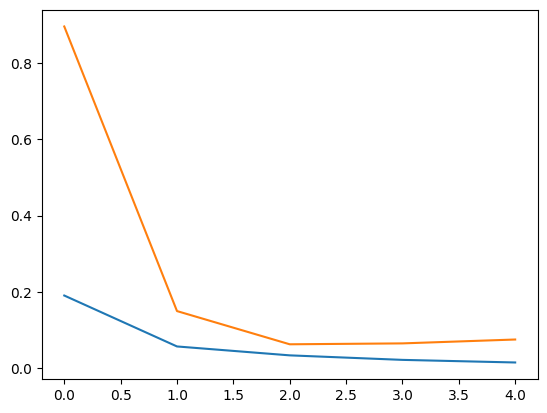

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [77]:
preds_val = cnn_model.predict(X_valid)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


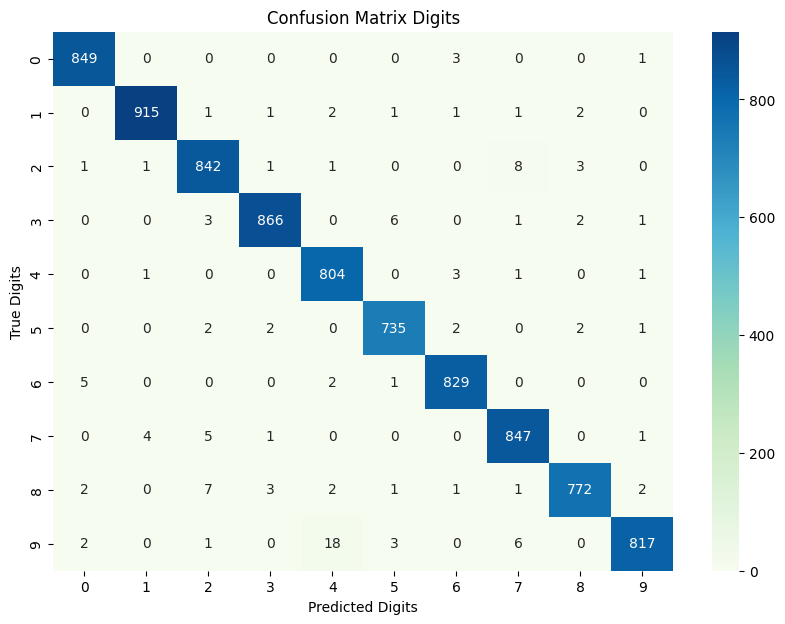

In [80]:
cm = confusion_matrix(np.argmax(y_valid, 1), np.argmax(preds_val, 1))

confusion_matrix_display(cm)